In [7]:
import snap
import community
import operator
import numpy as np
import pandas as pdd
import networkx as nx
import matplotlib.pyplot as plt
import random as random

In [284]:
FIn = snap.TFIn('../../graphs/investors_to_companies_directed/investors_to_companies_directed_folded.graph')
companies_to_companies = snap.TUNGraph.Load(FIn)
investors = np.load('../../graphs/investors_to_companies_directed/bipartite_source_class.npy')
companies = np.load('../../graphs/investors_to_companies_directed/bipartite_dest_class.npy')
node_values = np.load('../../graphs/investors_to_companies_directed/node_id_to_value.npy')

# Load the bipartite graph
bipartite_investors_companies = snap.LoadEdgeList(snap.PNGraph, '../../graphs/investors_to_companies_directed/investors_to_companies.txt', 0, 1)

In [343]:
nodeid_to_value = node_values.item()
for key in nodeid_to_value:
    if nodeid_to_value[key] == 'Reddit': print key, nodeid_to_value[key]

3658 Reddit


In [342]:
bfs_company = list(nx.bfs_tree(Gx, 3658 , depth_limit = 1))
print len(bfs_company)
sub_company = nx.subgraph(Gx, bfs_company )
nx.write_edgelist(sub_company, 'sub_company', delimiter = ',')

173


In [272]:
NodeItr = companies_to_companies.BegNI()
node_id_to_deg = {}
for node in range(companies_to_companies.GetNodes()):
    node_id_to_deg[NodeItr.GetId()] = NodeItr.GetDeg()
    NodeItr.Next()

In [273]:
Gx = nx.Graph()
for company in companies: Gx.add_node(company)

EdgeItr = companies_to_companies.BegEI()
for edge in range(companies_to_companies.GetEdges()):
    Gx.add_edge(EdgeItr.GetSrcNId(), EdgeItr.GetDstNId())
    EdgeItr.Next()

In [276]:
partition_companies = community.best_partition(Gx)

In [277]:
communities_companies = {}
community_sizes_companies = []
iteration = 0
for com in set(partition_companies.values()):
    list_nodes = [nodes for nodes in partition_companies.keys() if partition_companies[nodes] == com]
    communities_companies[iteration] = list_nodes
    community_sizes_companies.append(len(list_nodes))
    iteration += 1

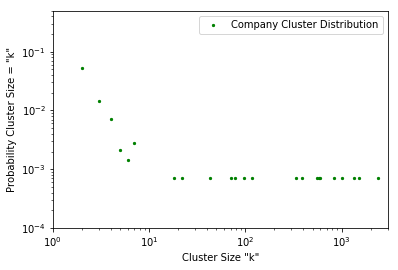

In [278]:
distribution = {}
for cluster in community_sizes_companies:
    if cluster in distribution: distribution[cluster] += 1
    else: distribution[cluster] = 1

X, Y = [], []
y_norm = 0.0
for key in distribution:
    X.append(key)
    Y.append(distribution[key]) 
    y_norm += distribution[key]
for key in range(0, len(Y)): Y[key] = Y[key] / y_norm

plt.scatter(X, Y, s = 5, color = 'g', label =  'Company Cluster Distribution', alpha = 1)

plt.scatter([.01], [.01], s = 5, color = 'g', alpha = 1)   
plt.xlim(1, 3000)
plt.ylim(0.0001, 0.5)                            
plt.yscale('log')
plt.xscale('log')

plt.xlabel("Cluster Size \"k\"")
plt.ylabel("Probability Cluster Size = \"k\"")
plt.legend()
plt.savefig("Cluster Degree Distributions.pdf")
plt.show()

In [279]:
big_community_sizes_companies = [comm for comm in community_sizes_companies if comm > 120]
print sorted(big_community_sizes_companies, reverse = True)
print float(sum(big_community_sizes_companies)) / sum(community_sizes_companies)
print len(community_sizes_companies)
small_community_size_companies = [comm for comm in community_sizes_companies if comm < 4]
print len(small_community_size_companies) / float(len(community_sizes_companies))

[2406, 1507, 1334, 1017, 830, 589, 586, 559, 386, 337]
0.825354303491
1405
0.974377224199


In [280]:
nodeid_to_value = node_values.item(0)
community_by_degree = {}
for com in communities_companies:
    if len(communities_companies[com]) > 800:
        node_to_degree = {}
        community = communities_companies[com]
        for index in range(len(communities_companies[com])):
            node = community[index]
            node_to_degree[node] = node_id_to_deg[node] 
        community_by_degree[com] = node_to_degree
        
for com in community_by_degree:
    community = community_by_degree[com]
    sorted_community = sorted(community.items(), key=operator.itemgetter(1), reverse = True)
    print "Community Size: ", len(community)
    iteration = 0
    for key in sorted_community:
        iteration += 1
        print nodeid_to_value[key[0]], key
        if iteration == 10: break

Community Size:  2406
nanosys (4788, 617)
Cortina Systems (4923, 606)
StreamBase Systems (4279, 573)
Message Bus (917, 457)
Intuity Medical (4445, 430)
Tracelytics (443, 415)
Newport Media (6711, 414)
SynapDx (1880, 413)
Appia (8944, 410)
Marketo (6471, 407)
Community Size:  830
Virool (1350, 881)
TaskRabbit (3977, 811)
LE TOTE (3805, 747)
drchrono (1365, 705)
Viki (2822, 685)
CatchFree (3979, 685)
Amicus (3783, 676)
Life360 (1463, 667)
Goldbely (1357, 639)
Kiwi Crate (877, 636)
Community Size:  1507
Box (2706, 1163)
Storenvy (7921, 848)
Expect Labs (1473, 751)
Carrier IQ (2958, 728)
Flurry (7170, 728)
Staccato Communications (4806, 713)
Apperian (6834, 701)
Concept.io (5284, 697)
Beceem Communications (2120, 659)
Eons (7887, 656)
Community Size:  1334
Path (510, 1316)
Ark (2712, 1240)
Twilio (3957, 1222)
The Climate Corporation (4836, 1196)
YuMe (4243, 1184)
Yammer (7625, 1169)
Backplane (1612, 1141)
IFTTT (517, 1131)
Twitter (1077, 1119)
Swiftype (3767, 1109)
Community Size:  1017
Dr

753


In [234]:
NodeItr = companies_to_companies.BegNI()
node_id_to_deg = {}
for node in range(companies_to_companies.GetNodes()):
    node_id_to_deg[NodeItr.GetId()] = NodeItr.GetDeg()
    NodeItr.Next()

In [235]:
FIn = snap.TFIn('../../graphs/investors_to_companies_directed/investors_to_companies_directed_folded_reverse_order.graph')
investors_to_investors = snap.TUNGraph.Load(FIn)
Gx = nx.Graph()
for investor in investors: Gx.add_node(investor)

EdgeItr = investors_to_investors.BegEI()
for edge in range(investors_to_investors.GetEdges()):
    Gx.add_edge(EdgeItr.GetSrcNId(), EdgeItr.GetDstNId())
    EdgeItr.Next()

In [236]:
NodeItr = investors_to_investors.BegNI()
node_id_to_deg = {}
for node in range(investors_to_investors.GetNodes()):
    node_id_to_deg[NodeItr.GetId()] = NodeItr.GetDeg()
    NodeItr.Next()

In [250]:
partition_investors = community.best_partition(Gx)

In [251]:
communities_investors = {}
community_sizes_investors = []
for com in set(partition_investors.values()):
    list_nodes = [nodes for nodes in partition_investors.keys() if partition_investors[nodes] == com]
    communities_investors[com] = list_nodes
    community_sizes_investors.append(len(list_nodes))

In [252]:
big_community_sizes_investors = [comm for comm in community_sizes_investors if comm > 115]
print big_community_sizes_investors
print float(sum(big_community_sizes_investors)) / sum(community_sizes_investors)
print len(community_sizes_investors)
small_community_size_investors = [comm for comm in community_sizes_investors if comm < 4]
print len(small_community_size_investors) / float(len(community_sizes_investors))

[978, 755, 268, 126, 151, 154, 204, 235, 235, 714, 169, 207, 133, 133, 132]
0.438987099857
3840
0.960677083333


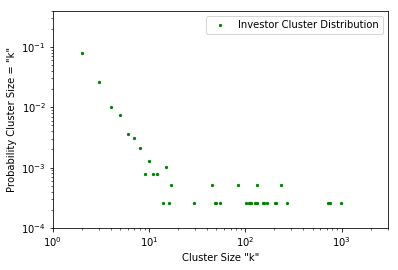

In [240]:
distribution = {}
for cluster in community_sizes_investors:
    if cluster in distribution: distribution[cluster] += 1
    else: distribution[cluster] = 1

X, Y = [], []
y_norm = 0.0
for key in distribution:
    X.append(key)
    Y.append(distribution[key]) 
    y_norm += distribution[key]
for key in range(0, len(Y)): Y[key] = Y[key] / y_norm

plt.scatter(X, Y, s = 5, color = 'g', label =  'Investor Cluster Distribution', alpha = 1)

plt.scatter([.01], [.01], s = 5, color = 'g', alpha = 1)   
plt.xlim(1, 3000)
plt.ylim(0.0001, 0.4)                            
plt.yscale('log')
plt.xscale('log')

plt.xlabel("Cluster Size \"k\"")
plt.ylabel("Probability Cluster Size = \"k\"")
plt.legend()
plt.savefig("Cluster Degree Distributions Investors.pdf")
plt.show()

In [253]:
nodeid_to_value = node_values.item()
investor_by_degree = {}
for com in communities_investors:
    if len(communities_investors[com]) > 100:
        node_to_degree = {}
        community = communities_investors[com]
        for index in range(len(communities_investors[com])):
            node = community[index]
            node_to_degree[node] = node_id_to_deg[node] 
        investor_by_degree[com] = node_to_degree
        
for com in investor_by_degree:
    community = investor_by_degree[com]
    sorted_community = sorted(community.items(), key=operator.itemgetter(1), reverse = True)
    print "Community Size: ", len(community)
    iteration = 0
    for key in sorted_community:
        iteration += 1
        print nodeid_to_value[key[0]], key
        if iteration == 5: break

Community Size:  235
Dave McClure (18240, 90)
Madrona Venture Group (12951, 50)
IDG Ventures (11613, 46)
Geoff Entress (18818, 42)
Maneesh Arora (20024, 41)
Community Size:  133
Great Oaks Venture Capital (10958, 58)
Jeff Fluhr (19258, 50)
Bob Pittman (17707, 45)
Hercules Technology Growth Capital (11341, 42)
Clark Landry (18065, 40)
Community Size:  978
SV Angel (15932, 500)
New Enterprise Associates (13702, 258)
First Round Capital (10022, 231)
Kleiner Perkins Caufield & Byers (12499, 217)
Founder Collective (10317, 192)
Community Size:  112
Marc Andreessen (20032, 50)
SVB Financial Group (15972, 35)
Ben Horowitz (17577, 23)
Kodiak Venture Partners (12548, 23)
Constellation Ventures (8481, 22)
Community Size:  755
Intel Capital (11916, 232)
Sequoia Capital (15309, 189)
US Venture Partners (16613, 105)
Goldman Sachs (10836, 99)
Mohr Davidow Ventures (13436, 99)
Community Size:  714
Polaris Venture Partners (14550, 107)
Venrock (16711, 97)
Foundation Capital (10279, 88)
InterWest Partn

In [271]:
bfs_sequoia = list(nx.bfs_tree(Gx, 15309, depth_limit = 1))
sub_sequoia = nx.subgraph(Gx, bfs_sequoia)
nx.write_edgelist(sub_sequoia, 'sequoia_sub', delimiter = ',')

In [155]:
def IoU(set1, set2):
    return float(len(set1.intersection(set2))) / len(set1.union(set2))

Now we run Louvain on the weighted companies and investors folded graphs

In [156]:
investors_to_companies = {}
companies_to_investors = {}

for NI in bipartite_investors_companies.Nodes():
    NId = NI.GetId()
    nbr_set = set([])

    if NId in investors:
        deg = NI.GetOutDeg()    
        for nbr_idx in range(deg):
            nbr_ID = NI.GetOutNId(nbr_idx)
            nbr_set.add(nbr_ID)
        investors_to_companies[NId] = nbr_set
            
    else:
        deg = NI.GetInDeg()
        for nbr_idx in range(deg):
            nbr_ID = NI.GetInNId(nbr_idx)
            nbr_set.add(nbr_ID)
        companies_to_investors[NId] = nbr_set

# Create weighted companies graph
weighted_companies = nx.Graph()
for EI in companies_to_companies.Edges():
    src = EI.GetSrcNId()
    dst = EI.GetDstNId()
    
    if not weighted_companies.has_node(src):
        weighted_companies.add_node(src)
        
    if not weighted_companies.has_node(dst):
        weighted_companies.add_node(dst)
    
    wt = IoU(companies_to_investors[src], companies_to_investors[dst])
    weighted_companies.add_edge(src, dst, weight=wt)
    
# Create weighted investors graph
weighted_investors = nx.Graph()
for EI in investors_to_investors.Edges():
    src = EI.GetSrcNId()
    dst = EI.GetDstNId()
    
    if not weighted_investors.has_node(src):
        weighted_investors.add_node(src)
        
    if not weighted_investors.has_node(dst):
        weighted_investors.add_node(dst)
    
    wt = IoU(investors_to_companies[src], investors_to_companies[dst])
    weighted_investors.add_edge(src, dst, weight=wt)

In [241]:
partition_companies_weighted = community.best_partition(weighted_companies)
partition_investors_weighted = community.best_partition(weighted_investors)

In [242]:
communities_companies = {}
community_sizes_companies = []
for com in set(partition_companies_weighted.values()):
    list_nodes = [nodes for nodes in partition_companies_weighted.keys() if partition_companies_weighted[nodes] == com]
    communities_companies[com] = list_nodes
    community_sizes_companies.append(len(list_nodes))
big_community_sizes_companies = [comm for comm in community_sizes_companies if comm > 330]
print big_community_sizes_companies
print float(sum(big_community_sizes_companies)) / sum(community_sizes_companies)
print len(community_sizes_companies)
small_community_size_companies = [comm for comm in community_sizes_companies if comm < 3]
print len(small_community_size_companies) / float(len(community_sizes_companies))

[1677, 547, 333, 385, 1319, 611, 877, 670, 393, 406]
0.700912798602
152
0.513157894737


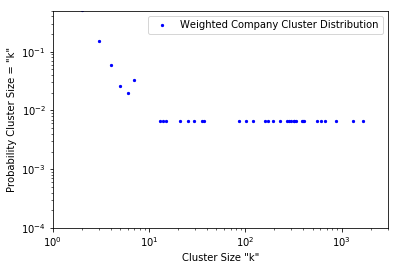

In [243]:
distribution = {}
for cluster in community_sizes_companies:
    if cluster in distribution: distribution[cluster] += 1
    else: distribution[cluster] = 1

X, Y = [], []
y_norm = 0.0
for key in distribution:
    X.append(key)
    Y.append(distribution[key]) 
    y_norm += distribution[key]
for key in range(0, len(Y)): Y[key] = Y[key] / y_norm

plt.scatter(X, Y, s = 5, color = 'b', label =  'Weighted Company Cluster Distribution', alpha = 1)

plt.scatter([.01], [.01], s = 5, color = 'g', alpha = 1)   
plt.xlim(1, 3000)
plt.ylim(0.0001, 0.5)                             
plt.yscale('log')
plt.xscale('log')

plt.xlabel("Cluster Size \"k\"")
plt.ylabel("Probability Cluster Size = \"k\"")
plt.legend()
plt.savefig("Cluster Degree Distributions Weighted Companies.pdf")
plt.show()

In [244]:
communities_investors = {}
community_sizes_investors = []
for com in set(partition_investors_weighted.values()):
    list_nodes = [nodes for nodes in partition_investors_weighted.keys() if partition_investors_weighted[nodes] == com]
    communities_investors[com] = list_nodes
    community_sizes_investors.append(len(list_nodes))
big_community_sizes_investors = [comm for comm in community_sizes_investors if comm > 85]
print big_community_sizes_investors
print float(sum(big_community_sizes_investors)) / sum(community_sizes_investors)
print len(community_sizes_investors)
small_community_size_investors = [comm for comm in community_sizes_investors if comm < 2]
print len(small_community_size_investors) / float(len(community_sizes_investors))

[1040, 97, 104, 113, 87, 500, 137, 95, 156, 89]
0.336862635832
700
0.0


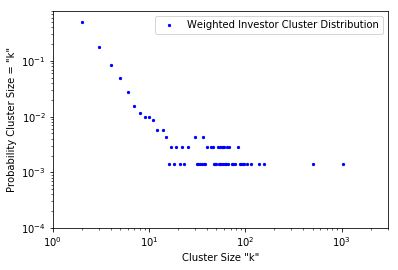

In [245]:
distribution = {}
for cluster in community_sizes_investors:
    if cluster in distribution: distribution[cluster] += 1
    else: distribution[cluster] = 1

X, Y = [], []
y_norm = 0.0
for key in distribution:
    X.append(key)
    Y.append(distribution[key]) 
    y_norm += distribution[key]
for key in range(0, len(Y)): Y[key] = Y[key] / y_norm

plt.scatter(X, Y, s = 5, color = 'b', label =  'Weighted Investor Cluster Distribution', alpha = 1)

plt.scatter([.01], [.01], s = 5, color = 'g', alpha = 1)   
plt.xlim(1, 3000)
plt.xlim(1, 3000)
plt.ylim(0.0001, 0.8)                            
plt.yscale('log')
plt.xscale('log')

plt.xlabel("Cluster Size \"k\"")
plt.ylabel("Probability Cluster Size = \"k\"")
plt.legend()
plt.savefig("Cluster Degree Distributions Weighted Investors.pdf")
plt.show()

In [166]:
nodeid_to_value = node_values.item()
investor_by_degree = {}
for com in communities_investors:
    if len(communities_investors[com]) > 499:
        node_to_degree = {}
        community = communities_investors[com]
        for index in range(len(communities_investors[com])):
            node = community[index]
            if node != 391: node_to_degree[node] = node_id_to_deg[node] 
        investor_by_degree[com] = node_to_degree
        
for com in investor_by_degree:
    community = investor_by_degree[com]
    sorted_community = sorted(community.items(), key=operator.itemgetter(1), reverse = True)
    print "Community Size: ", len(community)
    iteration = 0
    for key in sorted_community:
        iteration += 1
        print nodeid_to_value[key[0]]
        if iteration == 10: break

Community Size:  1039
SV Angel
New Enterprise Associates
Intel Capital
First Round Capital
Kleiner Perkins Caufield & Byers
Draper Fisher Jurvetson (DFJ)
Founder Collective
Lerer Ventures
Sequoia Capital
Greylock Partners
Community Size:  500
Brookside Capital
Integral Capital Partners
Wellcome Trust
Sofinnova Ventures
TPG Growth
Quaker BioVentures
Johnson & Johnson Development Corporation
Vulcan Capital
Domain Associates
Fidelity Ventures
